# Análisis de Salarios y Modelo Predictivo

Este notebook utiliza un dataset de salarios para construir un modelo de regresión lineal simple. El objetivo es predecir el salario de un empleado basándose en sus años de experiencia. El proceso incluye la carga de datos a través del catálogo de Kedro, el entrenamiento del modelo y la visualización de los resultados.

## 1. Inicialización del Entorno Kedro

Para asegurar que el notebook funcione dentro del contexto del proyecto Kedro, primero cargamos la extensión de Kedro para IPython y recargamos el proyecto. Esto nos da acceso al `context` y al `catalog`, permitiéndonos cargar datasets definidos en `conf/base/catalog.yml` de manera sencilla y reproducible.

In [5]:
%load_ext kedro.ipython
%reload_kedro

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


[09/28/25 00:11:27] INFO     Resolved project path as:                                              ]8;id=780757;file://c:\Users\javie\Documents\GitHub\DataSalaryKedro\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=795528;file://c:\Users\javie\Documents\GitHub\DataSalaryKedro\venv\Lib\site-packages\kedro\ipython\__init__.py#180\180]8;;\
                             C:\Users\javie\Documents\GitHub\DataSalaryKedro.                                      
                             To set a different path, run '%reload_kedro <project_root>'                           

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=556819;file://c:\Users\javie\Documents\GitHub\DataSalaryKedro\venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=594327;file://c:\Users\javie\Documents\GitHub\DataSalaryKedro\venv\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[09/28/25 00:11:28] INFO     Kedro project arquitec                                                 ]8;id=803769;file://c:\Users\javie\Documents\GitHub\DataSalaryKedro\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=161434;file://c:\Users\javie\Documents\GitHub\DataSalaryKedro\venv\Lib\site-packages\kedro\ipython\__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=257930;file://c:\Users\javie\Documents\GitHub\DataSalaryKedro\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=170561;file://c:\Users\javie\Documents\GitHub\DataSalaryKedro\venv\Lib\site-packages\kedro\ipython\__init__.py#147\147]8;;\
                             'pipelines'                                                                           

## 2. Carga de Datos

Utilizamos el `catalog` de Kedro para cargar el dataset `cleaned_salary_data`. Este es el conjunto de datos que ya ha sido procesado por un pipeline anterior y está listo para el análisis y modelado.

In [ ]:
# Cargar los datos usando el 'catalog' que creamos en la celda anterior
data = catalog.load("cleaned_salary_data") # type: ignore

# Imprimir los primeros 5 registros
data.head()

                    INFO     Loading data from cleaned_salary_data (ExcelDataset)...           ]8;id=638753;file://c:\Users\javie\Documents\GitHub\DataSalaryKedro\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=381967;file://c:\Users\javie\Documents\GitHub\DataSalaryKedro\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000
1,28,Female,Master's,Data Analyst,3.0,65000
2,45,Male,PhD,Senior Manager,15.0,150000
3,36,Female,Bachelor's,Sales Associate,7.0,60000
4,52,Male,Master's,Director,20.0,200000


## 3. Entrenamiento y Evaluación del Modelo de Regresión Lineal

En esta sección, realizamos los siguientes pasos:
- **Preparación:** Seleccionamos 'Years of Experience' como la variable independiente (X) y 'Salary' como la variable dependiente (y).
- **División:** Separamos los datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo en datos no vistos.
- **Entrenamiento:** Creamos una instancia de `LinearRegression` y la entrenamos con los datos de entrenamiento.
- **Evaluación:** Calculamos el coeficiente de determinación (R²) para medir qué tan bien la línea de regresión se ajusta a los datos.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Preparación de Datos
# Seleccionamos las columnas que usaremos.
# 'Years of Experience' es nuestra variable independiente (X)
# 'Salary' es nuestra variable dependiente (y)
features = ['Years of Experience']
target = 'Salary'

X = data[features]
y = data[target]

# 2. División de Datos (Entrenamiento y Prueba)
# Dividimos los datos para entrenar el modelo con una parte y evaluarlo con otra.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Entrenamiento del Modelo
# Creamos y entrenamos el modelo de regresión lineal.
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# 4. Evaluación del Modelo
# Hacemos predicciones con los datos de prueba.
y_pred = regressor.predict(X_test)

# Calculamos el coeficiente de determinación (R²) para ver qué tan bueno es el modelo.
# Un valor cercano a 1.0 es mejor.
score = r2_score(y_test, y_pred)

print(f"El coeficiente de determinación (R²) del modelo es: {score:.2f}")

# También podemos ver la fórmula de la regresión
print(f"Intercepto (b): {regressor.intercept_:.2f}")
print(f"Coeficiente (m) para 'Years of Experience': {regressor.coef_[0]:.2f}")
print(f"Fórmula: Salario ≈ {regressor.coef_[0]:.2f} * Años de Experiencia + {regressor.intercept_:.2f}")

El coeficiente de determinación (R²) del modelo es: 0.66
Intercepto (b): 58196.21
Coeficiente (m) para 'Years of Experience': 7072.86
Fórmula: Salario ≈ 7072.86 * Años de Experiencia + 58196.21


## 4. Visualización de Resultados

Finalmente, creamos un gráfico para visualizar el rendimiento del modelo. El gráfico muestra:
- Los **puntos de datos reales** (salarios observados).
- La **línea de regresión** generada por el modelo (salarios predichos).

Esto nos permite ver visualmente la relación entre los años de experiencia y el salario, así como la precisión de nuestro modelo.

                    WARNING  c:\Users\javie\Documents\GitHub\DataSalaryKedro\venv\Lib\site-packages ]8;id=976606;file://C:\Users\javie\AppData\Local\Programs\Python\Python311\Lib\warnings.py\warnings.py]8;;\:]8;id=633441;file://C:\Users\javie\AppData\Local\Programs\Python\Python311\Lib\warnings.py#110\110]8;;\
                             \sklearn\utils\validation.py:2749: UserWarning: X does not have valid                 
                             feature names, but LinearRegression was fitted with feature names                     
                               warnings.warn(                                                                      
                                                                                                                   

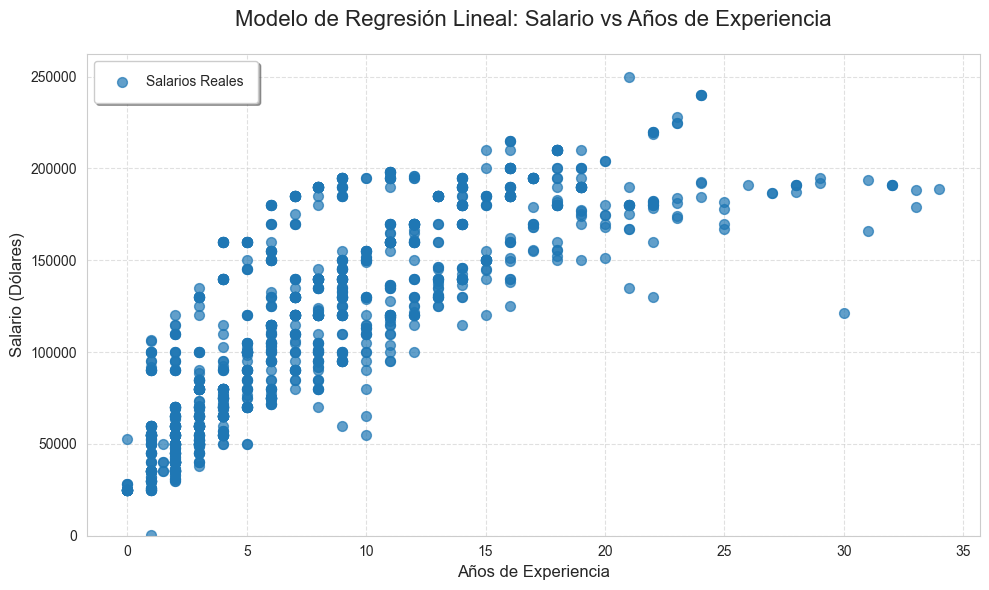

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Configuración estética con Seaborn ---
sns.set_style("whitegrid")

# --- Crear la figura y los ejes ---
plt.figure(figsize=(10, 6))

# 1. Dibuja los puntos de datos reales (salarios reales)
plt.scatter(X_test, y_test, color='#1f77b4', s=50, alpha=0.7, label='Salarios Reales')

# 2. Dibuja la línea de regresión (predicciones del modelo)
x_min_val = X[features[0]].min()
x_max_val = X[features[0]].max()
x_range = np.linspace(x_min_val, x_max_val, 100).reshape(-1, 1)
y_line = regressor.predict(x_range)

# --- Añade títulos y etiquetas para que el gráfico sea claro ---
plt.title('Modelo de Regresión Lineal: Salario vs Años de Experiencia', fontsize=16, pad=20)
plt.xlabel('Años de Experiencia', fontsize=12)
plt.ylabel('Salario (Dólares)', fontsize=12)

# --- Ajustes de los ejes ---
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(bottom=0)
plt.grid(True, linestyle='--', alpha=0.6)

# --- Muestra la leyenda ---
plt.legend(loc='upper left', fontsize=10, frameon=True, shadow=True, borderpad=1)

# --- Mejorar el diseño y mostrar ---
plt.tight_layout()
plt.show()